# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import random

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [3]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha_values = [0.1, 0.2, 0.3]

MSE = []
for alpha in alpha_values:
    w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
    w = w.ravel()
    MSE.append(np.square(y - x*w.T).mean())

MSE

[426.0450770831747, 476.2711324869085, 509.7667538092896]

## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [6]:
def sgd(X, y, lr, reg_coeff, epochs):

    w = np.random.rand(1,2)

    for i in range(epochs):
        for j in range(len(X)):
            pred = np.dot(X[j], w.T)
            gradient = -2*(y[j] - pred[0])*X[j] + reg_coeff*np.sign(w)
            w = w - lr*gradient
    return w

In [22]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15, 1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15, 1)

# Normalization 
x_min = np.min(x)
x_max = np.max(x)
x_normalized = (x - x_min) / (x_max - x_min)

y_min = np.min(y)
y_max = np.max(y)
y_normalized = (y - y_min) / (y_max - y_min)

# SGD
x_normalized_bis = np.asmatrix(np.c_[np.ones((15,1)),x_normalized])

I = np.identity(2)
alpha = 0.1 

lr = 10**(-2)
reg_coeff = 0
epochs = 10000

w = sgd(x_normalized_bis, y_normalized, lr, alpha, epochs)
w=w.ravel()
w = np.array(w[0])
w = w[0]
print(w)

[0.0324299  0.71257892]


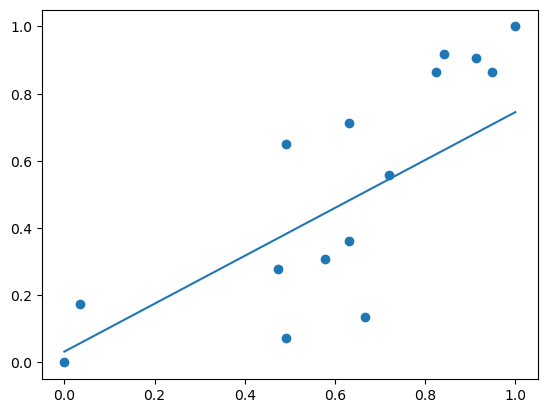

In [23]:
plt.scatter(x_normalized, y_normalized)
abs = np.linspace(0,1, 500)
ord = [w[0] + k*w[1] for k in abs]

plt.plot(abs, ord)
plt.show()

In [24]:
## With SKlearn

from sklearn.linear_model import Lasso

# Given data
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1)

# Instantiate Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization parameter (alpha) as needed

# Fit the model
lasso_model.fit(x, y)

# Print the coefficients
print("Coefficients:", lasso_model.coef_)

# Print the intercept
print("Intercept:", lasso_model.intercept_)

Coefficients: [1.61436768]
Intercept: [-180.26292655]


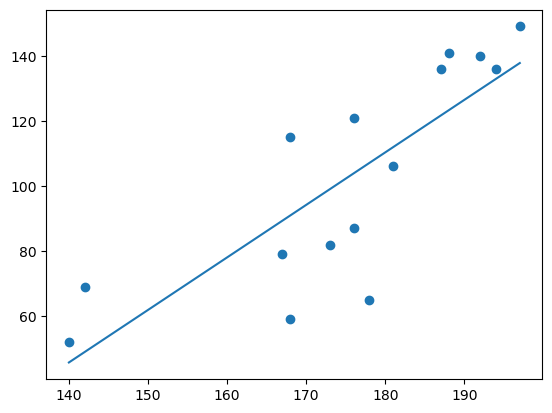

In [27]:
plt.scatter(x, y)
abs = np.linspace(min(x),max(x), 500)
ord = [lasso_model.intercept_ + k*lasso_model.coef_ for k in abs]

plt.plot(abs, ord)
plt.show()

## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [199]:

x1 = iris_df['sepal width (cm)'].values 
x2 = iris_df['sepal length (cm)'].values 
y = iris_df['petal length (cm)'].values

dataset_size = np.size(y)

mean_x1, mean_x2, mean_y = np.mean(x1), np.mean(x2), np.mean(y)


## Feature 1
SS_x1y = np.sum(y * x1) - dataset_size * mean_y * mean_x1
SS_x1x1 = np.sum(x1 * x1) - dataset_size * mean_x1 * mean_x1

## Feature 2
SS_x2y = np.sum(y * x2) - dataset_size * mean_y * mean_x2
SS_x2x2 = np.sum(x2 * x2) - dataset_size * mean_x2 * mean_x2

a1 = SS_x1y / SS_x1x1
a2 = SS_x2y / SS_x2x2
b = mean_y - a1 * mean_x1 - a1 * mean_x2


y_pred = a1 * x1 + a2 * x2 + b


print(y, y_pred)

[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1] [22.60736123 23.1032854  22.3845545  22.37223335 22.24799578 22.47080252
 21.8516669  22.59504009 22.34759106 22.92976325 22.81784682 22.22335349
 22.9174421  21.98822561 23.04065356 22.16072165 22.47080252 22.60736123
 23.20185456 22.08679478 23.33841328 22.26031693 21.50462259 22.95440554
 22.22335349 23.2891287  22.59504009 22.79320453 22.96672668 22.3845545
 22.74391995 23.33841328 21.75